# Mesa opinion dynamics example - Bounded confidence model

## Description

We present a model of opinion dynamics where agents adjust continuous opinions on the occasion of random binary encounters whenever their difference in opinion is below a given threshold. High thresholds yield convergence of opinions towards an average opinion, but low thresholds result in several opinion clusters: members of the same cluster share the same opinion but do not adjust any more with members of other clusters.

What would happen if opinion were a continuous variable such as the worthiness of a choice (a utility in economics), or some belief about adjustment of a control parameter?

The purpose of this model is to present results about continuous opinion dynamics when convergent opinion adjustments only pro- ceed when opinion difference is below a given threshold.

The rationale for the threshold condition is that agents only interact when their opinion are already close enough; otherwise they do not even bother to discuss. The reason for such behaviour might be for instance lack of understanding, conflicts of interest or social pressure. Although there is no reason to suppose that openness to discussion, here represented by threshold , is constant across population or even symmetrical on the occasion of a binary encounter, we will allways take it as a constant simulation parameter in the present model.

The analytical solution (possible for small values of the treshold d) implies that starting from an initial distribution of opinions in the population, any local higher opinion density is amplified. Peaks of opinions increase and valleys are depleted until very narrow peaks remains among a desert of intermediate opinions.

among connected agents

we now add to our model a condition on neighborhood: agents only interact if they are directly con- nected through a social pre-existing relation. Any agent can only interact with his four connected neighbours ( N, S, E and W) - von Neuman.

## Sample Model Description

The excercise model is a very simple simulated agent threshold model. The aim of the formal model presented here is the same: to predict, from the initial distribution of thresholds, the ultimate number or proportion making each of the two decisions. Mathematically, the question is one of finding an equilibrium in a process occurring over time.

We will explore models concerning:

- homogeneous mixing across the whole population
- mixing across a social network

The rules of our tutorial model:

1. a population of N agents with i continuous opinions xi (e.g. N = 2000)
     - convergence parameter mu [0, 0.5] (e.g. mu = 0.5)
     - opinion difference threshold d (e.g. d = 0.5)
2. Initially opinions were randomly generated across a uniform distribution on [0, 1]
3. At each time step any two randomly chosen agents meet, among connected agents. 
4. They re-adjust their opinion when their difference of opinion is smaller in magnitude than a threshold d.
5. opinions are then adjusted according to:
    - other_agent xi = other_agent xi + mu * (self xi - other_agent xi)
    - self xi = self xi + mu * (other_agent xi - self xi)

Despite its simplicity, this model yields results that are often unexpected to those not familiar with it. 
lattice is filled with a large majority of agents which have reached consensus around x = 0.5 apart from isolated agents which have “extremists” opin- ions closer to 0 or 1: the importance of extremists is the most noticeable difference with the full mxing case described in the previous section.

## How to use and modify the code

These excercises are designed around a Mesa template that is given to you to reuse. You are not asked to perform any complex object programming, but instead we ask for understanding of the core features of the Mesa pyhton package. You will mostly have to modifly the existing template and code the ``Model`` and ``Agent``behavior using standard python code.

**Therefore, in this excercise, you are asked to fill your code where the comments state:**

``#[Your code here]``

Let’s get started.

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

Each agent has a few parameters:
- engagement treshold - an agent's threshold for joining a riot is defined here as the proportion of the group he would have to see join before he would do so
- decision_reached - has the agent observed the proportion above its treshold of other agents joining the riot
- engaged - has the agent joined the riot

(Each agent will also have a unique identifier (i.e., a sequence position), stored in the ``unique_id`` variable. Giving each agent a unique id is a good practice when doing agent-based modeling.)

### At the location ``# 2 Step agent function [Your code here]`` you have to implement:

- if the agent is `engaged` in a riot then no behavior is needed, agent is already rioting

### At the location ``# 3 Proportion of these other agents joining the riot [Your code here]`` you have to implement:

- get a list of all scheduled agents
- calculate the proportion of these other agents joining the riot

### At the location ``# 4 Binary decision [Your code here]`` you have to implement:

- if the proportion of other agents joining the riot are above agent's treshold
- set this agent to have observed the proportion above its treshold of other agents joining the riot

### At the location ``# 5 Advance agent function [Your code here]`` you have to implement:

- if the agent is `engaged` in a riot then no simultaneous behavior is needed, agent is already rioting
- count up by 1 the number of rioting agents in the model
 
### At the location ``# 6 Engage decided agents simultaneously [Your code here]`` you have to implement:

- if the agent has already have observed the proportion above its treshold of other agents joining the riot
- set the agent as `engaged` in the riot

The beginning of both classes looks like this:

In [10]:
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import SingleGrid

In [11]:
class BoundedConfidenceAgentBasic(Agent):
    
    def __init__(self, pos, model, opinion):
        '''
         Create a new bounded confidence agent.

         Args:
            unique_id: Unique identifier for the agent
            opinion: An agent's initially opinion
        '''
        
        super().__init__(pos, model)
        
        # 1 Initialization [Your code here]
        self.pos = pos
        self.opinion = opinion
        
    def step(self):
        '''
        Run one step of the agent.
        '''
        
        # 2 Step agent function
        
        # Randomly chose agent [Your code here]
        neighbors = self.model.grid.get_neighbors(self.pos, moore=False)
        other_agent = self.random.choice(neighbors)
        
        # Evaluate agents difference of opinion [Your code here]
        opinions_distance = abs(self.opinion - other_agent.opinion)
        
        # Re-adjust agents opinions [Your code here]
        if opinions_distance < self.model.treshold:
            other_agent.opinion = other_agent.opinion + self.model.convergence * (self.opinion - other_agent.opinion)
            self.opinion = self.opinion + self.model.convergence * (other_agent.opinion - self.opinion)


## Adding the scheduler

Time in most agent-based models moves in steps, sometimes also called
**ticks**. At each step of the model, one or more of the agents –
usually all of them – are activated and take their own step, changing
internally and/or interacting with one another or the environment.

The **scheduler** is a special model component which controls the order
in which agents are activated. For example, all the agents may activate
in the same order every step; their order might be shuffled; we may try
to simulate all the agents acting at the same time; and more. Mesa
offers a few different built-in scheduler classes, with a common
interface. That makes it easy to change the activation regime a given
model uses, and see whether it changes the model behavior. This may not
seem important, but scheduling patterns can have an impact on your
results.

For now, let’s use one of the simplest ones: ``RandomActivation``, which
activates all the agents once per step, in random order. Every agent is
expected to have a ``step`` method. The step method is the action the
agent takes when it is activated by the model schedule. We add an agent
to the schedule using the ``add`` method; when we call the schedule’s
``step`` method, the model shuffles the order of the agents, then
activates and executes each agent’s ``step`` method.

With that in mind, the model code with the scheduler added looks like
this:

## Adding space

Many ABMs have a spatial element, with agents moving around and
interacting with nearby neighbors. Mesa currently supports two overall
kinds of spaces: grid, and continuous. Grids are divided into cells, and
agents can only be on a particular cell, like pieces on a chess board.
Continuous space, in contrast, allows agents to have any arbitrary
position. Both grids and continuous spaces are frequently
[toroidal](https://en.wikipedia.org/wiki/Toroidal_graph), meaning
that the edges wrap around, with cells on the right edge connected to
those on the left edge, and the top to the bottom. This prevents some
cells having fewer neighbors than others, or agents being able to go off
the edge of the environment.

Let’s add a simple spatial element to our model by putting our agents on
a grid and make them walk around based on the happines and homophily tershold.

Mesa has two main types of grids: ``SingleGrid`` and ``MultiGrid``.
``SingleGrid`` enforces at most one agent per cell; ``MultiGrid`` allows
multiple agents to be in the same cell. Since we want one agent per cell, we use ``SingleGrid``.

`from mesa.space import SingleGrid`

We instantiate a grid with width and height parameters, and a boolean as
to whether the grid is toroidal. Let’s make width and height model
parameters, in addition to the number of agents, and have the grid
always be toroidal. We can place agents on a grid with the grid’s
``position_agent`` method, which takes an agent and an (x, y) tuple of the
coordinates to place the agent.

Under the hood, each agent’s position is stored in two ways: the agent
is contained in the grid in the cell it is currently in, and the agent
has a ``pos`` variable with an (x, y) coordinate tuple. The
``position_agent`` method adds the coordinate to the agent automatically.

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

There are a number of model-level parameters: 

- height and width of the grid
- density of grid population to define how many agents and empty cells the model contains
- minority proportion to define proportion of two types of agents on the grid
- homophily treshold to which the agent is happy with its neighbourhood
- Use ``RandomActivation`` scheduler
- Use ``SingleGrid`` space with torus folding

**Hint:** Note that homophily treshold should be defined as the ratio of similar neighbours (e.g. 30% of similar agents), instead of a fixed number of neighbouring agents (3 similar agents). The problem of fixed number lies in the possibility of empty cells in the neighbourood, which might reduce the total number of neighbours from 8 possible neighbours, to a lower total number of neighbours. Consider an example where an agent requires 3 similar agents as neigbours (Case 1 - majority: 3 similar + 2 other = 5 neighbours/3 empty spaces; Case2 - balanced: 3 similar + 3 other = 6 neighbours/3 empty spaces; Case 3 - minority: 3 similar + 5 other = 8 neighbours/0 empty spaces). Using the ratio of similar neighbours of all neighbours solves this issue.

### At the location ``# 2 Create agents [Your code here]`` you have to implement:

- use uniform random numbers to populate the grid based on density parameter
- use uniform random numbers to selects agent type based on minority proportion

When a new model is started, we want it to populate the grid itself with the defined number of agents segregated on the given proportion between two groups.

In [12]:
class BoundedConfidenceModelBasic(Model):
            
    def __init__(self, height, width, treshold, convergence):
        '''
        Create a new bounded confidence model.

         Args:
            N: how many agents the model contains
            treshold: opinion difference threshold. Floating value from 0 to 1.
            convergence: convergence parameter. Floating value from 0 to 0.5.
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        self.treshold = treshold
        self.convergence = convergence
        
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(height, width, torus=True)
        
        self.running = True
        
        # 2 Create agents [Your code here]
        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            a = BoundedConfidenceAgentBasic((x, y), self, self.random.random())
            self.grid.position_agent(a, (x, y))
            self.schedule.add(a)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function
        
        self.schedule.step()


# 2. Run the Agent/Model Basic

### Running the model

At this point, we have a model which runs. 
You can see for yourself with a few easy lines. If you’ve been working in an jupyter notebook session, you can create a model object directly. 

With that last piece in hand, it’s time for the first rudimentary run of the model.

Now let’s create a model with 2000 agents, and run it for 100 steps. Set the opinion difference treshold and convergence parameter of the model to proposal. ``treshold = 0.5`` and ``convergence = 0.5``.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- number of agents is given already as 1000
- specify: treshold and convergence

In [13]:
model = BoundedConfidenceModelBasic(30, 30, 0.5, 0.5)# < Add model parameters [Your code here] )

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The bounded confidence model ran for {} steps'.format(model.schedule.steps))

The bounded confidence model ran for 100 steps


# 3. Visualize the Agent/Model

### At the location ``# Model parameters``:

- specify all model-level parameters of its __init__ function
- height and width are given already as 20 x 20, as well as density and minority proportion
- given: homophily treshold 20%

In [33]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer


def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "Layer": 0,
                 "r": 0.8}
    
    # 1 Color the agents based on their type to Red and Blue color
    portrayal["Color"] = "rgba("+ str(agent.opinion * 256) +",128,128,1.0)"
        
    return portrayal

grid = CanvasGrid(agent_portrayal, 30, 30, 500, 500)
server = ModularServer(BoundedConfidenceModelBasic,
                       [grid],
                       "Schelling Model",
                       {"width":30, "height":30, "treshold":0.2, "convergence":0.5}) # Model parameters

# 4. Run the Agent/Model Visualization

NOTE: Runtime server error is normal and expected when running visualization code below. This visualization code was made for command line execution (not explicitly for Jupyter Notebooks), so we are **forcing** it's use.

Just make sure to increment the port number counter each visualization run, to be able to use it.

In [34]:
server.port = 8529 # The default 8521 - increase the counter as you run the visalizations
server.launch() # Uncomment to run the visalization

Interface starting at http://127.0.0.1:8529


RuntimeError: This event loop is already running

Socket opened!
{"type":"reset"}


{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"get_step","step":11}
{"type":"get_step","step":12}
{"type":"get_step","step":13}
{"type":"get_step","step":14}
{"type":"get_step","step":15}
{"type":"get_step","step":16}
{"type":"get_step","step":17}
{"type":"get_step","step":18}
{"type":"get_step","step":19}
{"type":"get_step","step":20}
{"type":"get_step","step":21}
{"type":"get_step","step":22}
{"type":"get_step","step":23}
{"type":"get_step","step":24}
{"type":"get_step","step":25}
{"type":"get_step","step":26}
{"type":"get_step","step":27}
{"type":"get_step","step":28}
{"type":"get_step","step":29}
{"type":"get_step","step":30}
{"type":"get_step","step":31}
{"type":"get_step","step":32}
{"type":"get_step","step":33}
{"type":"get_step",

{"type":"get_step","step":269}
{"type":"get_step","step":270}
{"type":"get_step","step":271}
{"type":"get_step","step":272}
{"type":"get_step","step":273}
{"type":"get_step","step":274}


## Question 1

In previous steps you have visualized the bounded confidence model analysis for a high opinion difference treshold (e.g., ``treshold = 0.5``).
Now re-run the analysis for a low opinion difference treshold (e.g., ``treshold = 0.15``) and observe the difference in proportion of converged agents over all agents.

- Qualitatively describe what is this difference between these two outcomes and why?
- Do you notice polarization of opinion?

Put your code in the Answer 1.1 box below.

Put your text in the Answer 1.2 box below.

In [ ]:
# Answer 1.1 [Your code here]
server = ModularServer(SchellingModelBasic,
                       [grid],
                       "Schelling Model",
                       {"width":20, "height":20, "density":0.98, "minority_pc":0.5, "homophily":20}) # Model parameters

## Answer 1.2

[Your text answer here]

Convergence of opinions is observed, but uniformity is only achieved for the larger value of d.

The results are not very different from those observed with non-local opinion mix- ing described in the previous section, at least for the larger values of (d > 0.3). As seen on figure 5 the lattice is filled with a large majority of agents which have reached consensus around 0.5 apart from isolated agents which have “extremists” opin- ions closer to 0 or 1: the importance of extremists is the most noticeable difference with the full mxing case described in the previous section.

Interesting differences are noticeable for the smaller values of d < 0.3 as observed in figure 6. When several values are possible for clusters of converging opinions, consensus is can only be reached on connected clusters of agents.

Q2: Task 3 Figure 1, 2, 3:
- display the time evolution of opinions among a population 
- Another way to follow agents opinion dynamics is to plot final opinions as a func- tion of initial opinions.
- A large number of simulations were carried out and we found that the qualitative dynamics mostly depend on the threshold . and only influence convergence time and the width of the distribution of final opinions (when a large number of different random sampling are made). controls the number of peaks of the final distribution of opinions as shown in figure 4.

Implement the bounded confidence model in which agents interact in random pairs with their neighbours. Start the opinions of agents sampled from a uniform distribution and simulate the model for N = 100 agents, tolerance
threshold of d = 0.2, and attraction parameter ζ = 0.5. Visualize the evolution of opinions of agents
for 10000 iterations (you do not need to plot each iteration). Generate at least 10 visualizations of a
simulation.

- Do you always get the same number of groups?
- What is the most typical number of groups that you get?
- Do you ever get consensus?
- Can you identify ”wings” of agents that get stuck towards the ends of the opinion scale?


Q3: Repeat the above simulation 10 times for values of d from 0.1 to 0.6 by increases of 0.05. Implement a
function to automatically count the number of groups by rounding the opinions to 2 decimal digits and
counting unique values, so that you can get the number of groups after each simulation. Plot the number
of groups versus d for each simulation.

- What is the approximate relationship between the final number of groups and d?
- Do you sometimes have more groups than you expected? Why?
- Are there any values for which you always get consensus?


In [1]:
import random
import numpy as np

from mesa import Agent, Model
from mesa.time import RandomActivation, SimultaneousActivation
from mesa.datacollection import DataCollector

import networkx as nx

In [2]:
# Agent

class OpinionAgent(Agent):
    def __init__(self, unique_id, model, pers, sup):
        super().__init__(unique_id, model)
        self.persuad = pers #np.random.randint(0, max_persuad)
        self.support = sup #np.random.randint(0, max_support)
        self.sigma_s = 0
        self.sigma_p = 0

    def interact(self):
        agent_list = self.model.schedule.agents
        agent_opinion = self.opinion
        sigma_p = 0
        sigma_s = 0
        n = 0
        for source_agent in agent_list:
            immediacy = self.model.distance_func(self, source_agent)
            if (source_agent.opinion == agent_opinion) and (immediacy != -1):  # -1 is for no connected
                sigma_s += source_agent.support * 2 / (immediacy ** 2)  # 2 for (1+sig_i*sig_j
            elif (source_agent.opinion != agent_opinion) and (immediacy != -1):
                sigma_p += source_agent.persuad * 2 / (immediacy ** 2)  # 2 for (1-sig_i*sig_j
            n += 1
        return sigma_s, sigma_p

    def step(self):
        self.sigma_s, self.sigma_p = self.interact()

    def advance(self):
#        print(self.unique_id, ': Advance:')
        rand_hi = random.uniform(-self.model.hi, self.model.hi)
        if (self.sigma_p - self.sigma_s + rand_hi) > 0:
            if self.opinion == 1:
                self.opinion = -1
                self.model.minus_opinion += 1
                self.model.plus_opinion -= 1
            elif self.opinion == -1:
                self.opinion = +1
                self.model.minus_opinion -= 1
                self.model.plus_opinion += 1
            else:
                print("Incorrect opinion")
                exit(1)


In [3]:
# Data collection

def get_opinion_ratio(model):
    '''
    Find the % of agents that are of opinion.
    '''
    
    N = model.Ag_num
    opinion_n = model.plus_opinion
    
    return opinion_n / N

In [4]:
# Model

class OpinionModel(Model):
    """A model with some number of agents."""
    def __init__(self, Ag, distribution, beta, rand_seed, hi_param):
        self.Ag_num = Ag
        self.pers_sup_dist = distribution
        self.hi = hi_param  # to generate uniform(-hi,hi)

        random.seed(rand_seed*9 +3)  # Generate different random seeds
        np.random.seed(rand_seed*9 + 3)  # Generate different random seeds
        self.running = True

        self.self_distance = 1
        self.pers_sup_max = 100
        self.distance = 1

        self.step_counter = 0
        self.step_list = []
        self.beta_final_num_list = []

        self.set_opinions_degrees(beta)

        self.schedule = SimultaneousActivation(self)
        
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Plus_opinion": get_opinion_ratio}, agent_reporters={"Opinion": "opinion"}
        )
        
        # Create agents
        for x in range(Ag):
            pers, sup = self.set_pers_sup(x)
            a = OpinionAgent(x, self, pers, sup)
            a.opinion = self.opinion_array[x]
            self.schedule.add(a)

    def set_opinions_degrees(self, beta):
        self.opinion_array = np.ones(self.Ag_num, int)
        self.dmax = 0

        self.G = nx.barabasi_albert_graph(self.Ag_num, 2)  # barabasi_albert parameter = 2
        self.degree = self.G.degree()
        node_degree = [self.degree[i] for i in range(len(self.degree))]
        sort_index = np.argsort(node_degree)  # Ascending, needed for 'BA_most_deg'
        sort_index = [sort_index[-i] for i in range(1, len(sort_index) + 1)]  # Descending
        self.dmax = node_degree[sort_index[0]] # I debugged it, node-degree was forgotted
        for i in range(int(self.Ag_num * beta / 100)):
            self.opinion_array[i] = -1
        self.minus_opinion = int(self.Ag_num * beta / 100)
        self.plus_opinion = self.Ag_num - self.minus_opinion
        np.random.shuffle(self.opinion_array)

    def set_pers_sup(self, i):
        if self.pers_sup_dist == 'uniform':
            return random.uniform(0, self.pers_sup_max), random.uniform(0, self.pers_sup_max)
        elif self.pers_sup_dist == 'deg_ratio':
            return round(self.pers_sup_max * self.degree[i] / self.dmax), \
                   round(self.pers_sup_max * self.degree[i] / self.dmax)
        else:
            print("incorrect parameter for set_pers_sup")

    def distance_func(self, d_agent, s_agent):
        if d_agent.unique_id == s_agent.unique_id:
            return self.self_distance
        elif self.G.has_edge(s_agent.unique_id, d_agent.unique_id):
            return self.distance # distance between two connected nodes is supposed 1
        else:
            return -1 # means no connection

    def step(self):
        self.datacollector.collect(self)
        
        self.schedule.step()
        self.step_counter += 1
        self.step_list.append(self.step_counter)
        self.beta_final_num_list.append(self.minus_opinion)


In [5]:
# Test the model

ag_num = 1000  # Number of agents
hi = 1000
beta = 20
seed=15

model = OpinionModel(Ag=ag_num, distribution='uniform', beta=beta, rand_seed=seed, hi_param=hi)
for i in range(100):
    model.step()

<AxesSubplot:>

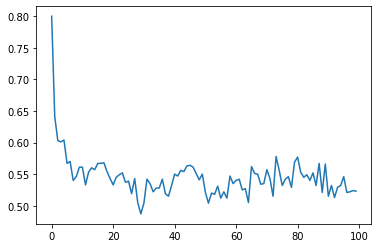

In [6]:
# Show results

model_data = model.datacollector.get_model_vars_dataframe()
model_data.Plus_opinion.plot()

In [7]:
opinions = model.datacollector.get_agent_vars_dataframe()
opinions.head()

Opinion
Step AgentID         
0    0             -1
     1             -1
     2              1
     3              1
     4             -1

## Basic model - Mixing beliefs among interacting agents

In [7]:
# Basic Agent

class OpinionAgent(Agent):
    def __init__(self, unique_id, model, treshold, convergence, opinion):
        super().__init__(unique_id, model)
        self.treshold = treshold
        self.convergence = convergence
        self.opinion = opinion

    def step(self):
        other_agent = self.random.choice(self.model.schedule.agents)
        opinions_distance = abs(self.opinion - other_agent.opinion)
        if opinions_distance < self.treshold:
            other_agent.opinion = other_agent.opinion + other_agent.convergence * (self.opinion - other_agent.opinion)
            self.opinion = self.opinion + self.convergence * (other_agent.opinion - self.opinion)


In [8]:
# Basic Model

class OpinionModel(Model):
    """A model with some number of agents."""
    def __init__(self, Ag, treshold, convergence):
        self.Ag_num = Ag
        self.treshold = treshold
        self.convergence = convergence

        self.schedule = RandomActivation(self)
        
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Treshold": "treshold"}, agent_reporters={"Opinion": "opinion"}
        )
        
        # Create agents
        for x in range(Ag):
            a = OpinionAgent(x, self, treshold, convergence, random.random())
            self.schedule.add(a)

    def step(self):
        self.datacollector.collect(self)
        
        self.schedule.step()


In [9]:
# Test the basic model

ag_num = 1000  # Number of agents
tresh_d = 0.5 # 0.2 Opinions distance treshold
conver_mu = 0.5

model = OpinionModel(Ag=ag_num, treshold=tresh_d, convergence=conver_mu)
for i in range(100):
    model.step()

<AxesSubplot:xlabel='Step', ylabel='Opinion'>

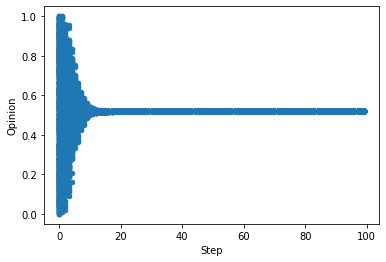

In [10]:
# Show results

opinions = model.datacollector.get_agent_vars_dataframe()
opinions.reset_index(level='Step', inplace=True)
opinions.plot.scatter(x = 'Step', y = 'Opinion')

In [37]:
# Basic Agent with Space

from mesa.space import SingleGrid

class OpinionAgent(Agent):
    def __init__(self, unique_id, pos, model, treshold, convergence, opinion):
        super().__init__(pos, model)
        self.treshold = treshold
        self.convergence = convergence
        self.opinion = opinion

        self.pos = pos
        
    def step(self):
        neighbors = self.model.grid.neighbor_iter(self.pos, moore=False)
        other_agent = self.random.choice(list(neighbors))
        opinions_distance = abs(self.opinion - other_agent.opinion)
        if opinions_distance < self.treshold:
            other_agent.opinion = other_agent.opinion + other_agent.convergence * (self.opinion - other_agent.opinion)
            self.opinion = self.opinion + self.convergence * (other_agent.opinion - self.opinion)


In [38]:
# Basic Model

class OpinionModel(Model):
    """A model with some number of agents."""
    def __init__(self, height, width, Ag, treshold, convergence):
        self.Ag_num = Ag
        self.treshold = treshold
        self.convergence = convergence

        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(height, width, torus=True)
        
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"Treshold": "treshold"}, agent_reporters={"Opinion": "opinion"}
        )
        
        # Create agents
        id_count = 0
        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            a = OpinionAgent(id_count, (x, y), self, treshold, convergence, random.random())
            self.grid.position_agent(a, (x, y))
            self.schedule.add(a)
            id_count = id_count + 1

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()


In [45]:
# Test the basic model

ag_num = 1000  # Number of agents
tresh_d = 0.3 # 0.2 Opinions distance treshold
conver_mu = 0.3

height = 29
width = 29
    
model = OpinionModel(height=height, width=width, Ag=ag_num, treshold=tresh_d, convergence=conver_mu)
for i in range(100):
    model.step()

<AxesSubplot:xlabel='Step', ylabel='Opinion'>

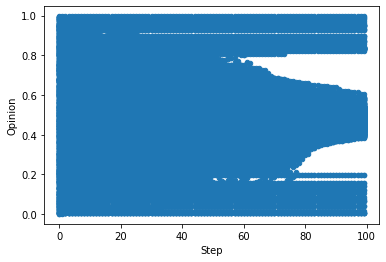

In [46]:
# Show results

opinions = model.datacollector.get_agent_vars_dataframe()
opinions.reset_index(level='Step', inplace=True)
opinions.plot.scatter(x = 'Step', y = 'Opinion')

Task: There is a PDF and R code on tasks needed to be done.